In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
SPX = pd.read_csv('spx.csv', names = ['time', 'SPX_open', 'SPX_high', 'SPX_low', 'SPX_close'])
AAPL_pr = pd.read_csv('AAPL_pr.csv', 
                   names = ['time', 'AAPL_open', 'AAPL_high', 'AAPL_low', 'AAPL_close', 'AAPL_vol'],
                   index_col = None)
AMZN_pr = pd.read_csv('AMZN_pr.csv', 
                   names = ['time', 'AMZN_open', 'AMZN_high', 'AMZN_low', 'AMZN_close', 'AMZN_vol'])
MSFT_pr = pd.read_csv('MSFT_pr.csv', 
                   names = ['time', 'MSFT_open', 'MSFT_high', 'MSFT_low', 'MSFT_close', 'MSFT_vol'])
FB_pr = pd.read_csv('FB_pr.csv', 
                 names = ['time', 'FB_open', 'FB_high', 'FB_low', 'FB_close', 'FB_vol'])
TSLA_pr = pd.read_csv('TSLA_pr.csv', 
                   names = ['time', 'TSLA_open', 'TSLA_high', 'TSLA_low', 'TSLA_close', 'TSLA_vol'])

In [3]:
AAPL_pr['time'] = AAPL_pr['time'].apply(lambda x: x.replace('-', '.'))

prices = pd.merge(SPX, AAPL_pr, on = 'time', how = 'inner', sort = False)

In [4]:
AMZN_pr['time'] = AMZN_pr['time'].apply(lambda x: x.replace('-', '.'))
MSFT_pr['time'] = MSFT_pr['time'].apply(lambda x: x.replace('-', '.'))
FB_pr['time'] = FB_pr['time'].apply(lambda x: x.replace('-', '.'))
TSLA_pr['time'] = TSLA_pr['time'].apply(lambda x: x.replace('-', '.'))

prices = pd.merge(prices, AMZN_pr, on = 'time', how = 'inner', sort = False)
prices = pd.merge(prices, MSFT_pr, on = 'time', how = 'inner', sort = False)
prices = pd.merge(prices, FB_pr, on = 'time', how = 'inner', sort = False)
prices = pd.merge(prices, TSLA_pr, on = 'time', how = 'inner', sort = False)

In [5]:
prices.head()

,time,SPX_open,SPX_high,SPX_low,SPX_close,AAPL_open,AAPL_high,AAPL_low,AAPL_close,AAPL_vol,...,FB_open,FB_high,FB_low,FB_close,FB_vol,TSLA_open,TSLA_high,TSLA_low,TSLA_close,TSLA_vol
0,2019.01.02 09:30:00,2476.96,2476.96,2470.98,2470.40,154.89,155.25,154.53,154.7800,685823,...,128.9900,130.00,128.5600,129.7950,463088,306.1000,307.30,304.00,305.960,249055
1,2019.01.02 09:31:00,2470.80,2474.09,2473.70,2470.80,154.79,155.55,154.78,155.1597,158277,...,129.7600,130.20,129.7500,130.1100,238676,305.6690,310.69,305.31,308.805,174035
2,2019.01.02 09:32:00,2473.56,2473.56,2471.44,2471.26,155.18,155.30,154.77,154.8073,155007,...,130.1100,130.65,130.0291,130.4329,125284,308.8128,309.10,306.33,306.937,125475
3,2019.01.02 09:33:00,2471.30,2472.88,2471.67,2469.64,154.83,154.90,154.58,154.6700,170003,...,130.4889,130.80,130.2200,130.4700,131233,307.1211,307.21,305.00,305.110,84015
4,2019.01.02 09:34:00,2471.88,2472.49,2471.04,2470.11,154.63,155.00,154.62,154.7500,146408,...,130.5150,130.82,130.3600,130.6524,117937,305.0250,305.92,303.33,303.880,108184


In [6]:
prices['time'] = prices['time'].apply(lambda x: pd.Timestamp(ts_input = x, tz = 'US/Eastern'))

prices['AAPL-1'] = prices['AAPL_open'].shift(periods = 1)
prices['AAPL-2'] = prices['AAPL_open'].shift(periods = 2)

prices['AMZN-1'] = prices['AMZN_open'].shift(periods = 1)
prices['AMZN-2'] = prices['AMZN_open'].shift(periods = 2)

prices['MSFT-1'] = prices['MSFT_open'].shift(periods = 1)
prices['MSFT-2'] = prices['MSFT_open'].shift(periods = 2)

prices['FB-1'] = prices['FB_open'].shift(periods = 1)
prices['FB-2'] = prices['FB_open'].shift(periods = 2)

prices['TSLA-1'] = prices['TSLA_open'].shift(periods = 1)
prices['TSLA-2'] = prices['TSLA_open'].shift(periods = 2)

In [7]:
AMZN_news = pd.read_excel('AMZN.xlsx', index_col = 0)
MSFT_news = pd.read_excel('MSFT.xlsx', index_col = 0)
FB_news = pd.read_excel('FB.xlsx', index_col = 0)
TSLA_news = pd.read_excel('TSLA.xlsx', index_col = 0)

In [8]:
AAPL_news = pd.read_excel('AAPL.xlsx', index_col = 0)

news_orig = AMZN_news.append(MSFT_news).append(FB_news).append(TSLA_news).append(AAPL_news)

In [9]:
AAPL = pd.read_csv(r'C:\Users\kozyr\Downloads\AAPL_val')
AAPL

,Unnamed: 0,time_good,Article,ticker,time_tz,valid,start,end,CAR,CAR_perc,class
0,798,2019-11-07 16:28:00+02:00,LISBON (Reuters) - Apple Pay has attracted reg...,AAPL,2019-11-07 09:28:00-05:00,True,2019-11-07 08:28:00-05:00,2019-11-07 10:28:00-05:00,-0.003952,-0.395154,0
1,799,2019-11-07 16:20:00+02:00,"LISBON, Nov 7 (Reuters) - Europe’s antitrust c...",AAPL,2019-11-07 09:20:00-05:00,True,2019-11-07 08:20:00-05:00,2019-11-07 10:20:00-05:00,-0.004776,-0.477578,0
2,800,2019-11-07 03:08:00+02:00,(Reuters) - Qualcomm Inc said on Wednesday it ...,AAPL,2019-11-06 20:08:00-05:00,True,2019-11-06 19:08:00-05:00,2019-11-06 21:08:00-05:00,0.000000,0.000000,0
3,801,2019-11-06 23:15:00+02:00,(Reuters) - Qualcomm Inc QCOM.O on Wednesday f...,AAPL,2019-11-06 16:15:00-05:00,True,2019-11-06 15:15:00-05:00,2019-11-06 17:15:00-05:00,0.001699,0.169877,0
4,802,2019-11-06 16:23:00+02:00,(Reuters) - Apple Inc on Wednesday said that U...,AAPL,2019-11-06 09:23:00-05:00,True,2019-11-06 08:23:00-05:00,2019-11-06 10:23:00-05:00,-0.001586,-0.158615,0
...,...,...,...,...,...,...,...,...,...,...,...
523,1322,2019-01-03 04:57:00+02:00,Jan 2 (Reuters) - Billionaire Warren Buffett h...,AAPL,2019-01-02 21:57:00-05:00,True,2019-01-02 20:57:00-05:00,2019-01-02 22:57:00-05:00,0.000000,0.000000,0
524,1324,2019-01-03 02:52:00+02:00,"SHANGHAI, Jan 3 (Reuters) - Shares in Asia fel...",AAPL,2019-01-02 19:52:00-05:00,True,2019-01-02 18:52:00-05:00,2019-01-02 20:52:00-05:00,0.000000,0.000000,0
525,1325,2019-01-03 01:38:00+02:00,NEW YORK (Reuters Breakingviews) - Apple’s war...,AAPL,2019-01-02 18:38:00-05:00,True,2019-01-02 17:38:00-05:00,2019-01-02 19:38:00-05:00,0.000000,0.000000,0
526,1326,2019-01-02 17:15:00+02:00,NEW YORK (Reuters) - Yields on long-dated U.S....,AAPL,2019-01-02 10:15:00-05:00,True,2019-01-02 09:15:00-05:00,2019-01-02 11:15:00-05:00,-0.003630,-0.362979,0


In [10]:
def day(ts):
    l = ts.split("'")
    return l[1]

def hour(ts):
    l = ts.split("'")
    return l[-2]

def year(day):
    l = day.split(' ')
    return l[-1]

def good_day(day):
    l = day.split(' ')
    return l[1][:-1]

def month(day):
    l = day.split(' ')
    NewDictionary = {"January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6, "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12}
    return NewDictionary[l[0]]
def good_hour(hour):
    l = hour.split(':')
    A_F = l[-1].split(' ')[-1]
    if A_F == 'AM':
        return l[0]
    elif A_F == 'PM' and l[0] == '12':
        return '0'
    
    else:
        return str(int(l[0]) + 12)

def minute(hour):
    l = hour.split(':')[-1]
    return l.split(' ')[0]

def valid(oldest, newest, time):
    return (time > oldest and time < newest)



In [11]:
news = (AMZN_news, MSFT_news, FB_news, TSLA_news)

oldest = min(prices['time'])
newest = max(prices['time'])

In [12]:
for comp in news:
    comp['day'] = comp['time'].apply(day)
    comp['hour'] = comp['time'].apply(hour)

    comp['year'] = comp['day'].apply(year)
    comp['month'] = comp['day'].apply(month)
    comp['day'] = comp['day'].apply(good_day)


    comp['minute'] = comp['hour'].apply(minute)
    comp['hour'] = comp['hour'].apply(good_hour)

    comp['time_good'] = comp.apply(lambda x: pd.Timestamp(year = int(x[5]),
                                                                    month = int(x[6]), day = int(x[3]),
                                                                    hour = int(x[4]), minute = int(x[7]), tz = 'Europe/Athens'), 
                                             axis = 1)
    comp['time_tz'] = comp['time_good'].apply(lambda x: x.tz_convert('US/Eastern'))
    
    comp['valid'] = comp['time_tz'].apply(lambda x: valid(oldest, newest, x))

In [13]:
TSLA = TSLA_news[['time_good', 'Article', 'ticker', 'time_tz', 'valid']]
TSLA = TSLA[TSLA['valid'] == True]

AMZN = AMZN_news[['time_good', 'Article', 'ticker', 'time_tz', 'valid']]
AMZN = AMZN[AMZN['valid'] == True]

MSFT = MSFT_news[['time_good', 'Article', 'ticker', 'time_tz', 'valid']]
MSFT = MSFT[MSFT['valid'] == True]

FB = FB_news[['time_good', 'Article', 'ticker', 'time_tz', 'valid']]
FB = FB[FB['valid'] == True]

In [14]:

news_orig = AMZN.append(MSFT).append(FB).append(TSLA).append(AAPL)
news_orig

,time_good,Article,ticker,time_tz,valid,Unnamed: 0,start,end,CAR,CAR_perc,class
825,2019-11-08 14:56:00+02:00,(Reuters) - Amazon.com Inc said on Friday it p...,AMZN,2019-11-08 07:56:00-05:00,True,NaN,NaN,NaN,NaN,NaN,NaN
826,2019-11-07 10:30:00+02:00,Nov 7 (Reuters) - Amazon:* In statement dated ...,AMZN,2019-11-07 03:30:00-05:00,True,NaN,NaN,NaN,NaN,NaN,NaN
827,2019-11-07 12:29:00+02:00,(Reuters) - Amazon Inc's AMZN.O Australia unit...,AMZN,2019-11-07 05:29:00-05:00,True,NaN,NaN,NaN,NaN,NaN,NaN
828,2019-11-07 12:51:00+02:00,A federal appeals court on Wednesday grilled t...,AMZN,2019-11-07 05:51:00-05:00,True,NaN,NaN,NaN,NaN,NaN,NaN
829,2019-11-07 12:19:00+02:00,Nov 7 (Reuters) - Australia’s Zip Co Ltd said ...,AMZN,2019-11-07 05:19:00-05:00,True,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
523,2019-01-03 04:57:00+02:00,Jan 2 (Reuters) - Billionaire Warren Buffett h...,AAPL,2019-01-02 21:57:00-05:00,True,1322.0,2019-01-02 20:57:00-05:00,2019-01-02 22:57:00-05:00,0.000000,0.000000,0.0
524,2019-01-03 02:52:00+02:00,"SHANGHAI, Jan 3 (Reuters) - Shares in Asia fel...",AAPL,2019-01-02 19:52:00-05:00,True,1324.0,2019-01-02 18:52:00-05:00,2019-01-02 20:52:00-05:00,0.000000,0.000000,0.0
525,2019-01-03 01:38:00+02:00,NEW YORK (Reuters Breakingviews) - Apple’s war...,AAPL,2019-01-02 18:38:00-05:00,True,1325.0,2019-01-02 17:38:00-05:00,2019-01-02 19:38:00-05:00,0.000000,0.000000,0.0
526,2019-01-02 17:15:00+02:00,NEW YORK (Reuters) - Yields on long-dated U.S....,AAPL,2019-01-02 10:15:00-05:00,True,1326.0,2019-01-02 09:15:00-05:00,2019-01-02 11:15:00-05:00,-0.003630,-0.362979,0.0


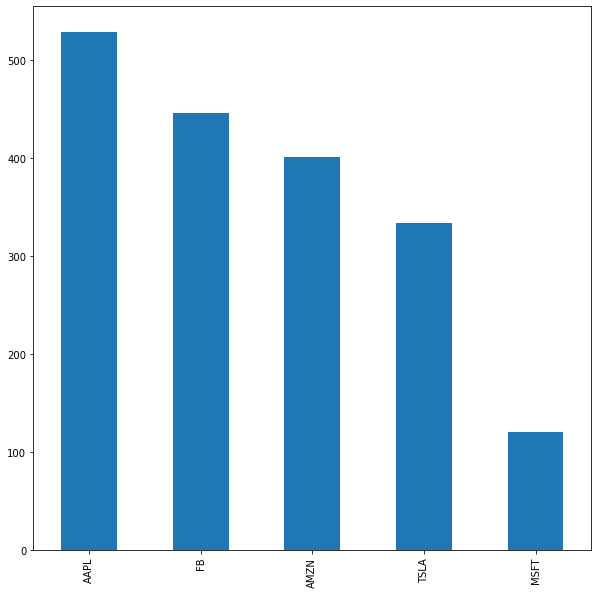

In [15]:
news_orig.ticker.value_counts().plot(kind='bar', figsize = (10,10))

In [16]:
prices['SPX-1'] = prices['SPX_open'].shift(periods = 1)
prices_less = prices[2:]

params = {}
companies = ('AMZN', 'MSFT', 'FB', 'TSLA')

In [17]:
for i in companies:
    prices_less['R_t_' + i] = (prices_less[i + '_open'] - prices_less[i + '-1']) / prices_less[i + '-1']
    prices_less['R_t-1_' + i] = (prices_less[i +'-1'] - prices_less[i + '-2']) / prices_less[i + '-2']
    prices_less['R_m'] = (prices_less['SPX_open'] - prices_less['SPX-1']) / prices_less['SPX-1']
    
    y = prices_less['R_t_' + i]
    X = sm.add_constant(prices_less[['R_t-1_' + i, 'R_m']])
    
    mod_normal_ret = sm.OLS(y, X)
    res = mod_normal_ret.fit()
    params[i] = list(res.params)

<ipython-input-17-a17a3f68a8c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices_less['R_t_' + i] = (prices_less[i + '_open'] - prices_less[i + '-1']) / prices_less[i + '-1']
<ipython-input-17-a17a3f68a8c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices_less['R_t-1_' + i] = (prices_less[i +'-1'] - prices_less[i + '-2']) / prices_less[i + '-2']
<ipython-input-17-a17a3f68a8c9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [18]:
def CAR(start, end, dataframe, comp):
    inside = dataframe.copy()
    important = inside[(inside['time'] >= start) & (inside['time'] <= end)]
    important['AR'] = important['R_t_' + comp] - params[comp][0] - params[comp][1] * important['R_t-1_' + comp] - params[comp][2] * important['R_m']
    CAR = np.sum(important['AR'])
    return CAR

In [19]:
news = (AMZN, MSFT, FB, TSLA)


for i in news:
    
    i['start'] = i['time_tz'] - pd.Timedelta(hours = 1)
    i['end'] = i['time_tz'] + pd.Timedelta(hours = 1)
    i['CAR'] = i.apply(lambda x: CAR(x['start'], x['end'], prices_less, i['ticker'].max()), axis = 1)
    
    i['hour'] = i['start'].apply(lambda x: x.hour)

<ipython-input-18-4f206ec1f65f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important['AR'] = important['R_t_' + comp] - params[comp][0] - params[comp][1] * important['R_t-1_' + comp] - params[comp][2] * important['R_m']


In [20]:
AMZN_new = AMZN[(AMZN['hour'] > 8) & (AMZN['hour'] < 15)]
MSFT_new = MSFT[(MSFT['hour'] > 8) & (MSFT['hour'] < 15)]
FB_new = FB[(FB['hour'] > 8) & (FB['hour'] < 15)]
TSLA_new = TSLA[(TSLA['hour'] > 8) & (TSLA['hour'] < 15)]

In [21]:
News = AMZN_new.append(MSFT_new)
News = News.append(FB_new)
News = News.append(TSLA_new)

In [22]:
News

,time_good,Article,ticker,time_tz,valid,start,end,CAR,hour
830,2019-11-06 18:43:00+02:00,LOS ANGELES (Reuters) - Amazon.com Inc AMZN.O ...,AMZN,2019-11-06 11:43:00-05:00,True,2019-11-06 10:43:00-05:00,2019-11-06 12:43:00-05:00,-0.001852,10
834,2019-11-01 16:03:00+02:00,NEW DELHI (Reuters) - India's antitrust body h...,AMZN,2019-11-01 10:03:00-04:00,True,2019-11-01 09:03:00-04:00,2019-11-01 11:03:00-04:00,-0.001099,9
838,2019-10-28 21:34:00+02:00,WASHINGTON (Reuters) - If Amazon.com decides t...,AMZN,2019-10-28 15:34:00-04:00,True,2019-10-28 14:34:00-04:00,2019-10-28 16:34:00-04:00,0.000605,14
839,2019-10-28 18:31:00+02:00,(Reuters) - Amazon.com Inc's AMZN.O firm grip ...,AMZN,2019-10-28 12:31:00-04:00,True,2019-10-28 11:31:00-04:00,2019-10-28 13:31:00-04:00,0.001594,11
840,2019-10-27 18:02:00+02:00,WASHINGTON (Reuters) - Microsoft Corp MSFT.O h...,AMZN,2019-10-27 12:02:00-04:00,True,2019-10-27 11:02:00-04:00,2019-10-27 13:02:00-04:00,0.000000,11
...,...,...,...,...,...,...,...,...,...
971,2019-01-21 17:05:00+02:00,AMSTERDAM (Reuters) - Tesla’s Model 3 has been...,TSLA,2019-01-21 10:05:00-05:00,True,2019-01-21 09:05:00-05:00,2019-01-21 11:05:00-05:00,0.000000,9
973,2019-01-20 20:17:00+02:00,Jan 20 (Reuters) - Warren Buffett’s Berkshire ...,TSLA,2019-01-20 13:17:00-05:00,True,2019-01-20 12:17:00-05:00,2019-01-20 14:17:00-05:00,0.000000,12
974,2019-01-18 21:02:00+02:00,NEW YORK (Reuters Breakingviews) - Elon Musk i...,TSLA,2019-01-18 14:02:00-05:00,True,2019-01-18 13:02:00-05:00,2019-01-18 15:02:00-05:00,-0.012406,13
982,2019-01-08 21:33:00+02:00,FRANKFURT (Reuters) - Mercedes-Benz sold 2.31 ...,TSLA,2019-01-08 14:33:00-05:00,True,2019-01-08 13:33:00-05:00,2019-01-08 15:33:00-05:00,-0.003256,13


In [23]:
AMZN_new.to_csv('AMZN_preprocessed')
MSFT_new.to_csv('MSFT_preprocessed')
FB_new.to_csv('FB_preprocessed')
TSLA_new.to_csv('TSLA_preprocessed')
News.to_csv('News')

In [24]:
prices_less.to_csv('prices')

In [25]:
params

{'AMZN': [-1.0341821523997128e-06, -0.08329426198199043, 1.4145101248296674],
 'MSFT': [1.523450718051852e-06, -0.09920667006685027, 1.3858647152591084],
 'FB': [1.280991653128218e-06, 0.0033097782341172713, 1.3654402306731899],
 'TSLA': [-1.3160822647094636e-06, -0.009187967459211499, 1.3641194624114346]}

In [29]:
News_orig = AMZN.append(MSFT).append(FB).append(TSLA).append(AAPL)

In [31]:
News_orig.to_csv('News_orig')